# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [3]:
#Data generation

#data of Gaussian Distributions
np.random.seed(seed = 3)
#distribution1
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T
#distribution2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

#### Excercise: A) Plot the decision boundary

'Optimal is green and Naive is black'

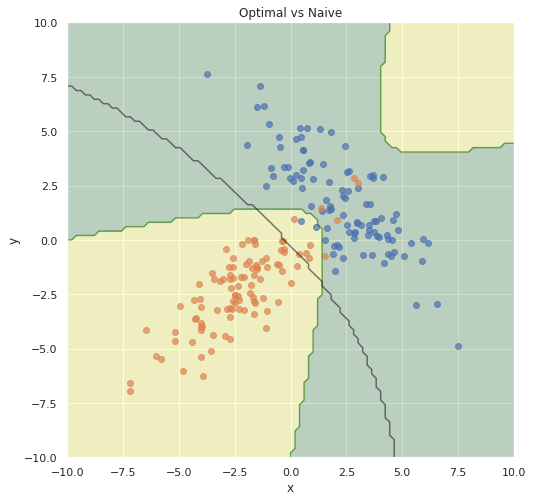

In [4]:
mus = [mu1,mu2]
sigmas = [sigma1,sigma2]

N = len(x1)
x_axis = np.linspace(-10, 10, N)
y_axis = np.linspace(-10, 10, N)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

fig = plt.figure(figsize = (8,8))
fig_fin = fig.add_subplot(1,1,1)

# Optimal Bayesian
optimal_bayesian_init = []

for tempx, tempy in zip(np.ravel(x_axis), np.ravel(y_axis)):
    scores_list = []
    classes = len(mus)
    for i in range(classes):
        score = scipy.stats.multivariate_normal.pdf(np.array([tempx,tempy]), mean=mus[i], cov=sigmas[i])
        scores_list.append(score)
    
    optimal_bayesian_init = np.append(optimal_bayesian_init,np.argmax(scores_list))

optimal_bayesian = np.array([optimal_bayesian_init])
Z = optimal_bayesian.reshape(x_axis.shape)

# Plotting Optimal Bayesian
fig_fin.contour( x_axis, y_axis, Z, 1, alpha = .5, colors = ('darkgreen','yellow'))
fig_fin.contourf( x_axis, y_axis, Z, 1, alpha = .2, colors = ('darkgreen','yellow'))

# Naive Bayesian
tmp1 = np.hstack((x1,x2));
tmp2 = np.hstack((y1,y2));
tmp_final = np.transpose(np.vstack((tmp1,tmp2)))
data = np.asarray(tmp_final)
labels = np.hstack((np.zeros(N),np.ones(N)))

naive_bayesian_model = GaussianNB(priors = None)
naive_bayesian_model.fit(data,labels)

naive_bayesian = [];

for temp1, temp2 in zip(np.ravel(x_axis), np.ravel(y_axis)):
    naive_bayesian = np.append(naive_bayesian, [naive_bayesian_model.predict( [[temp1,temp2]])[0]]);

Z = naive_bayesian.reshape(x_axis.shape)

# Plotting Naive Bayesian
fig_fin.contour( x_axis, y_axis, Z, 1, alpha = .5, colors = ('black'))

# Plotting data
fig_fin.scatter(x1, y1, alpha = .7)
fig_fin.scatter(x2, y2, alpha = .7)
fig_fin.set_xlabel('x')
fig_fin.set_ylabel('y')
fig_fin.set_title('Optimal vs Naive')
display('Optimal is green and Naive is black')

plt.show()

#### Excercise: B) Accuracies

In [5]:
#Optimal Bayes accuracy
y_pred = []

for tempx, tempy in zip(np.ravel(data[:,0]), np.ravel(data[:,1])):
    scores_list = []
    classes = len(mus)
    for i in range(classes):
        score = scipy.stats.multivariate_normal.pdf(np.array([tempx,tempy]), mean=mus[i], cov=sigmas[i])
        scores_list.append(score)
        
    y_pred = np.append(y_pred,np.argmax(scores_list))

tmp_len = len(y_pred)
tmp_correct = 0

for i in range(tmp_len):
    if y_pred[i] == labels[i]:
        tmp_correct = tmp_correct + 1

display('Optimal Bayes accuracy',float(float(tmp_correct) / float(tmp_len)))

#Naive Bayes accuracy
display('Naive Bayes accuracy',naive_bayesian_model.score(data,labels))

'Optimal Bayes accuracy'

0.965

'Naive Bayes accuracy'

0.95